## DecisionTrees - HDB_Database Example (resale price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn

### Load data file without null values

In [2]:
data = pd.read_csv('HDB_database.csv').dropna()
data

,month,town,flat_type,addresses,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,searchval,X,Y,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,20-Aug,ANG MO KIO,3 ROOM,331 ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,59 years 06 months,274000.0,TECK GHEE VIEW,29941.74561,38240.88157,1.362111,103.850767,881.003375,8703.096482,1041.995726
1,20-Aug,ANG MO KIO,3 ROOM,333 ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,59 years 06 months,315000.0,TECK GHEE VIEW,30045.48338,38155.86680,1.361343,103.851699,985.490578,8617.203081,1048.316784
2,20-Aug,ANG MO KIO,3 ROOM,307C ANG MO KIO AVE 1,16 TO 18,70.0,Model A,2012,91 years 01 month,500000.0,TECK GHEE VISTA,29318.86604,38622.31673,1.365561,103.845169,689.479121,9113.711978,1199.433818
3,20-Aug,ANG MO KIO,3 ROOM,331 ANG MO KIO AVE 1,01 TO 03,82.0,New Generation,1981,59 years 05 months,315000.0,TECK GHEE VIEW,29941.74561,38240.88157,1.362111,103.850767,881.003375,8703.096482,1041.995726
4,20-Aug,ANG MO KIO,3 ROOM,471 ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1979,58 years,235000.0,TECK GHEE HORIZON,30602.40075,38390.67192,1.363466,103.856703,1072.597799,8872.728560,1542.266971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,20-Aug,YISHUN,EXECUTIVE,258 YISHUN ST 22,01 TO 03,154.0,Maisonette,1985,63 years 09 months,530000.0,HDB-YISHUN,28721.75915,46317.74732,1.435156,103.839804,830.455528,16883.935510,377.031439
2433,20-Aug,YISHUN,EXECUTIVE,611 YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,66 years 03 months,598000.0,NEE SOON CENTRAL MEADOWS,28315.41791,44664.11187,1.420201,103.836153,472.288614,15264.628720,530.766169
2434,20-Aug,YISHUN,EXECUTIVE,643 YISHUN ST 61,01 TO 03,142.0,Apartment,1987,66 years 01 month,510000.0,HDB-YISHUN,28458.31899,44789.53725,1.421335,103.837437,662.983861,15374.950720,373.478202
2435,20-Aug,YISHUN,EXECUTIVE,724 YISHUN ST 71,07 TO 09,142.0,Apartment,1986,64 years 11 months,555000.0,KHATIB SPRING,27621.33645,45357.85481,1.426475,103.829916,655.684638,16047.820670,1340.339325


#### Select useful columns

In [3]:
df = data[['flat_type','floor_area_sqm','lease_commence_date',
           'distanceWithMrt','distanceWithRaffles','distanceWithGdPri','resale_price']]
df

,flat_type,floor_area_sqm,lease_commence_date,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
0,3 ROOM,68.0,1981,881.003375,8703.096482,1041.995726,274000.0
1,3 ROOM,68.0,1981,985.490578,8617.203081,1048.316784,315000.0
2,3 ROOM,70.0,2012,689.479121,9113.711978,1199.433818,500000.0
3,3 ROOM,82.0,1981,881.003375,8703.096482,1041.995726,315000.0
4,3 ROOM,67.0,1979,1072.597799,8872.728560,1542.266971,235000.0
...,...,...,...,...,...,...,...
2432,EXECUTIVE,154.0,1985,830.455528,16883.935510,377.031439,530000.0
2433,EXECUTIVE,146.0,1987,472.288614,15264.628720,530.766169,598000.0
2434,EXECUTIVE,142.0,1987,662.983861,15374.950720,373.478202,510000.0
2435,EXECUTIVE,142.0,1986,655.684638,16047.820670,1340.339325,555000.0


In [4]:
# convert the flat_type to integer category
df=df.replace(['2 ROOM','3 ROOM','4 ROOM','5 ROOM','EXECUTIVE'],[2,3,4,5,0])
df

,flat_type,floor_area_sqm,lease_commence_date,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
0,3,68.0,1981,881.003375,8703.096482,1041.995726,274000.0
1,3,68.0,1981,985.490578,8617.203081,1048.316784,315000.0
2,3,70.0,2012,689.479121,9113.711978,1199.433818,500000.0
3,3,82.0,1981,881.003375,8703.096482,1041.995726,315000.0
4,3,67.0,1979,1072.597799,8872.728560,1542.266971,235000.0
...,...,...,...,...,...,...,...
2432,0,154.0,1985,830.455528,16883.935510,377.031439,530000.0
2433,0,146.0,1987,472.288614,15264.628720,530.766169,598000.0
2434,0,142.0,1987,662.983861,15374.950720,373.478202,510000.0
2435,0,142.0,1986,655.684638,16047.820670,1340.339325,555000.0


In [5]:
# divide resale_price into three categories, 0, 1 and 2
def myfunction(x):
    if x <= 375000:
        return 0
    elif x <= 500000:
        return 1
    else:
        return 2
    
df["resale_price"] = df["resale_price"].apply(myfunction)
df

,flat_type,floor_area_sqm,lease_commence_date,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
0,3,68.0,1981,881.003375,8703.096482,1041.995726,0
1,3,68.0,1981,985.490578,8617.203081,1048.316784,0
2,3,70.0,2012,689.479121,9113.711978,1199.433818,1
3,3,82.0,1981,881.003375,8703.096482,1041.995726,0
4,3,67.0,1979,1072.597799,8872.728560,1542.266971,0
...,...,...,...,...,...,...,...
2432,0,154.0,1985,830.455528,16883.935510,377.031439,2
2433,0,146.0,1987,472.288614,15264.628720,530.766169,2
2434,0,142.0,1987,662.983861,15374.950720,373.478202,2
2435,0,142.0,1986,655.684638,16047.820670,1340.339325,2


### Train our model

In [53]:
from sklearn.model_selection import train_test_split

# with distanceWithGdPri, the accuracy_score is 0.78
# X = df.iloc[:,0:6]

# without distanceWithGdPri, the accuracy_score is 0.8
X = df.iloc[:,0:5]
y = df['resale_price']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1827, 5)
(610, 5)
(1827,)
(610,)


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
result = dt.fit(X_train, y_train)

In [56]:
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8


In [57]:
from sklearn import tree
import graphviz
from graphviz import Source

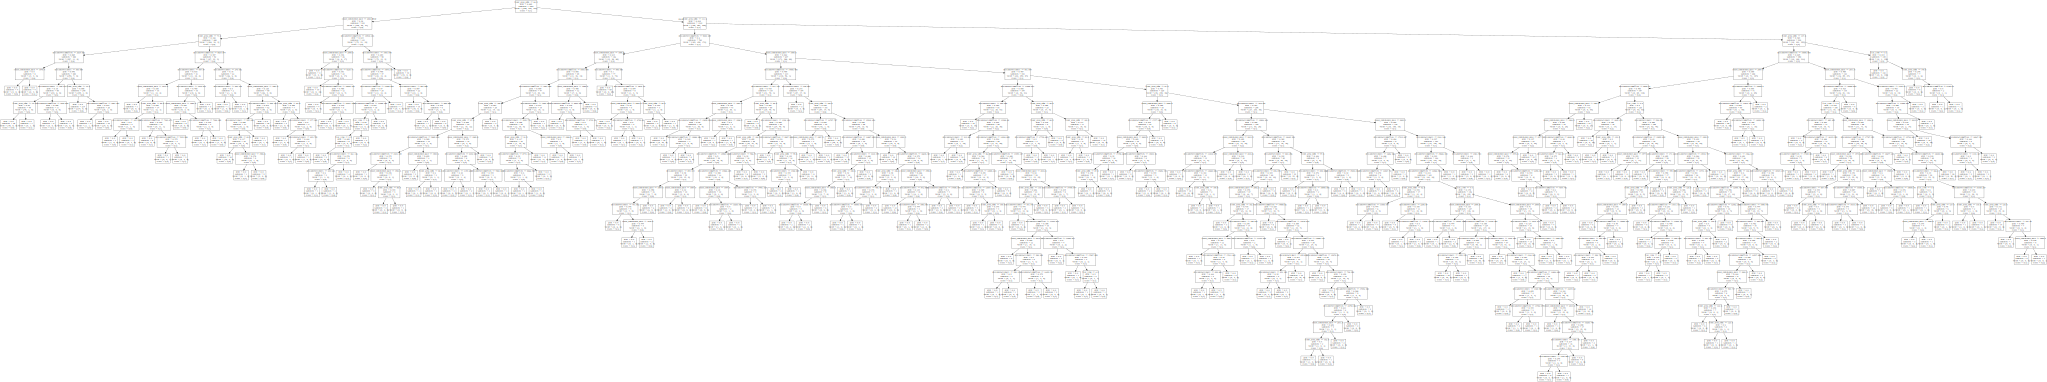

In [58]:
Source(tree.export_graphviz(dt,out_file=None,class_names=True,feature_names=X_train.columns))